<a href="https://colab.research.google.com/github/sreekruti/CPP-oops/blob/main/mentalhealthproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Develop a model that can predict whether a employee seek treatment or not and Identify the key features that lead to mental health problems in tech space.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#reading and printing head
data=pd.read_csv('/content/survey.csv')
print(data.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [ ]:
#SHAPE
data.shape

(1259, 27)

In [ ]:
#descriptive statistics of dataset
data.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
#We can see there are 26 columns where age is numerical and remaining all are categorical.
#Time stamp is a useless column, it indicated the time when person filled the form used for surveying.

In [ ]:
#the number of missing values in the dataset.
data.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#Comments column has almost 87% null values. It can be understood as it is not a mandatory question to answer in survey.We can safely drop this column.
#For Work_interfere and self_employed , we need to consider treating these columns.

In [ ]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
#More than 75% of people are from US. It is not that more people from US are suffering from mental health problems, the survey is taken up mostly by the US people.
#There are very few people who took part in survey from other countries, so it is often misleading to conclude people from certain region suffer more.
#So we will drop this column

In [ ]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [ ]:
#removing comments,timestamp,state columns
data.drop(["comments","Timestamp","state"],axis=1,inplace=True)

In [ ]:
#printing unique values for work interference and self employment columns
print(f"Work Interfere unique values:{data['work_interfere'].unique()}")
print(f"Self Employed unique values:{data['self_employed'].unique()}")
print(f"Treatment unique values:{data['treatment'].unique()}")

Work Interfere unique values:['Often' 'Rarely' 'Never' 'Sometimes' nan]
Self Employed unique values:[nan 'Yes' 'No']
Treatment unique values:['Yes' 'No']


In [ ]:
#replacing 'nan' with 'no idea' in work_interfere column and droping na values in self_employed column
data["work_interfere"].replace(np.nan,"no idea",inplace=True)
data.dropna(subset=["self_employed"],inplace=True)
print(data)

      Age Gender         Country self_employed family_history treatment  \
18     46   male   United States           Yes            Yes        No   
19     36   Male          France           Yes            Yes        No   
20     29   Male   United States            No            Yes       Yes   
21     31   male   United States           Yes             No        No   
22     46   Male   United States            No             No       Yes   
...   ...    ...             ...           ...            ...       ...   
1254   26   male  United Kingdom            No             No       Yes   
1255   32   Male   United States            No            Yes       Yes   
1256   34   male   United States            No            Yes       Yes   
1257   46      f   United States            No             No        No   
1258   25   Male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
18        Sometime

In [ ]:
#replacing age column values with 0 if less than 18 or greater than 100 and median is 0
data['Age'] = data['Age'].apply(lambda x : x if x >18 else 0)
data['Age'] = data['Age'].apply(lambda x : 0 if x >100 else x)
data['Age'] = data['Age'].apply(lambda x : data.Age.median() if x ==0 else x)


In [ ]:
data['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
male_str=['M','Male','male','m','Male-ish','maile','something kinda male?',
          'Cis Male','Mal', 'Male (CIS)','Make','Male ','Man','msle','Guy (-ish) ^_^',
          'male leaning androgynous','Mail','cis male','Malr', 'Cis Man''ostensibly male, unsure what that really means', 'Cis Man']

female_str=['Female', 'Female ', 'female', 'Cis Female', 'F', 'Woman', 'f','cis-female/femme', 'Female (cis)','femail']

trans_str=['Trans-female', 'queer/she/they', 'Femake', 'woman',
           'Genderqueer','Trans woman', 'Female (trans)','queer',]

other_str=['non-binary', 'Nah', 'All', 'Enby','fluid', 'Androgyne', 'Agender','Neuter','A little about you','p','ostensibly male, unsure what that really means']

data['Gender'].replace(to_replace = other_str, value = 'other',inplace=True)
data['Gender'].replace(to_replace = male_str, value = 'male',inplace=True)
data['Gender'].replace(to_replace = female_str, value = 'female',inplace=True)
data['Gender'].replace(to_replace = trans_str, value = 'trans',inplace=True)
data["Gender"].unique()

array(['male', 'female', 'trans', 'other'], dtype=object)

In [ ]:
data.shape

(1241, 24)

In [ ]:
#EDA
#Histograms
import plotly.express as px
px.histogram(data,x="Gender",title="Gender histplot")

In [ ]:
px.histogram(data,x="Gender",
             color="treatment",
             barmode="group",
             title="gender wise treatment")

In [ ]:
px.histogram(data,x="Age",title="Age histplot")

In [ ]:
plt.figure(figsize=(8,8))
px.histogram(data, x = 'treatment',color='treatment')

<Figure size 800x800 with 0 Axes>

In [ ]:
px.histogram(data, x = 'Age' , color = 'treatment' )

In [ ]:
#Nearly 50% of people are seeking help.This is a very large portion. Studies show that Mental illness is a major risk factor for suicide , So we must ensure that every person seeking help must be treated Insight for model building
#This is our target variable
#There is no class imbalance so there is no need of resampling

In [ ]:
px.histogram(data, x = 'self_employed',color='treatment',barmode='group')

In [ ]:
#Around 10% of people are self employed. Even though there is vast difference in this, people seeking treatment are of same percentage in both categories.
#Thus whether self employed or not , does not really matter on whether the person seeks treatment or not. Insight for model building
#There is imbalance in the categories but the class distribution in each category is similar. So this might not have any effect on model

In [ ]:
px.histogram(data,x="work_interfere",title="Work_interfere histplot")

In [ ]:
data['work_interfere'].value_counts(normalize = True)

Sometimes    0.369057
no idea      0.212732
Never        0.166801
Rarely       0.136986
Often        0.114424
Name: work_interfere, dtype: float64

In [ ]:
px.histogram(data, x = 'work_interfere',color='treatment',barmode='group')

In [ ]:
#About 78% of respondents have experienced interference at work with a ratio of rarely, sometimes, and frequently.
#Mental health conditions sometimes become an interfere while working about 45%.
#The plots prove that almost 80% want to get treatment. But it's surprising to know even mental health never has interfered at work, there is a little group that still want to get treatment before it become a job stress.
#It can be triggered by the requirements of the job do not match the capabilities, resources or needs of the worker
#If you are running a tech organization , you should consider providing resources for employees seeking treatment and it will help in boosting employee experience and will definitely increase their productivity.

In [ ]:
px.histogram(data,x="Country",title="Country histplot")

In [ ]:
px.histogram(data,x="family_history",title="Family history histplot")


In [ ]:
px.histogram(data, x = 'family_history',color='treatment',barmode='group')

In [ ]:
#People who have family history of mental illness are more likely to seek treatment. Around 35% of people without family history are also seeking help Insight for model building
#People with family history are more likely to seek treatment than without family history
#Family history will be a important feature

<Axes: xlabel='remote_work', ylabel='count'>

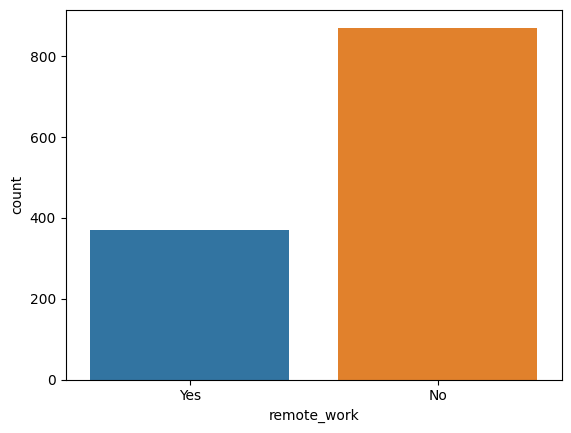

In [ ]:
sns.countplot(data = data , x = 'remote_work')

In [ ]:
px.histogram(data, x = 'remote_work',color='treatment',barmode='group')

In [ ]:
px.histogram(data,x="benefits",title="benefits histplot")


In [ ]:
data['benefits'].value_counts(normalize = True)

Yes           0.378727
Don't know    0.323127
No            0.298147
Name: benefits, dtype: float64

In [ ]:
px.histogram(data, x = 'benefits',color='treatment',barmode='group')

In [ ]:
#We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
#Coming to the second graph,we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. So we can see the employer resources are utilized to a larger extent.
#Even if you think about the cost , you should definitely go for it because it is efficiently utilized by the employees.
#Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

In [ ]:
px.histogram(data,x="care_options",title="care_options histplot")

In [ ]:
data['care_options'].value_counts(normalize=True)

No          0.398066
Yes         0.353747
Not sure    0.248187
Name: care_options, dtype: float64

In [ ]:
px.histogram(data, x = 'care_options',color='treatment',barmode='group')


In [ ]:
#40% of employees are not provided any care options and 25% are not sure whether care options exist in company.
#We can see 60% of employees whos organization dont have care options are seeking treatment.
#These organizations needs to address this issue. People who have care options are actually seeking treatment, this can validate our claim to have care options.

In [ ]:
px.histogram(data,x="no_employees",title="no_employees histplot")

In [ ]:
px.histogram(data, x = 'no_employees',color='benefits',barmode='group')

In [ ]:
px.histogram(data, x = 'no_employees',color='treatment',barmode='group')


In [ ]:
#More than 50% of people in every organization whether it is small or large doesn't matter, they are seeking help.
#This problem is more relevant in small sized orgs, may be due to fewer health benefits provided.

In [ ]:
px.histogram(data,x="wellness_program",title="wellness_program histplot")

In [ ]:
px.histogram(data, x = 'wellness_program',color='treatment',barmode='group')


In [ ]:
#Most of the respondants employers haven't discussed mental health as a employee wellness program.
#Around 50% People who don't know about the program are seeking help. This means organizations should explain the mental health benefits provided by the company
#Companies should include mental health in the employee wellness program.This shouldn't be overlooked

In [ ]:
px.histogram(data,x="treatment",title="Treatment histplot")

In [ ]:
px.histogram(data,x="seek_help",title="seek_help histplot")

In [ ]:
px.histogram(data, x = 'seek_help',color='treatment',barmode='group')


In [ ]:
#Most of the companies either don't provide any resources or it may be that They dont provide information about the existing resources
#This is a valuable insight, if you are an HR , Do look into providing resources and utilizing the existing resources

In [ ]:
px.histogram(data,x="anonymity",title="anonymity histplot")

In [ ]:
px.histogram(data, x = 'anonymity',color='treatment',barmode='group')


In [ ]:
px.histogram(data,x="leave",title="leave histplot")

In [ ]:
px.histogram(data, x = 'leave',color='treatment',barmode='group')


In [ ]:
px.histogram(data,x="supervisor",title="Supervisor histplot")

In [ ]:
px.histogram(data,x="mental_vs_physical",
             title="mental_vs_physical histplot")

In [ ]:
px.histogram(data, x = 'mental_vs_physical',color='treatment',barmode='group')

In [ ]:
px.histogram(data, x = 'mental_health_consequence',color='treatment',barmode='group')


In [ ]:
#Around 70% of people either thinks discussing mental health problem will have negative consequence or not sure whether it will have a impact.
#And out of people who think it will have a negative impact, most people seek treatment.

In [ ]:
px.histogram(data,x="coworkers",title="coworkers histplot")

In [ ]:
px.histogram(data, x = 'coworkers',color='treatment',barmode='group')


In [ ]:
px.histogram(data,x="supervisor",title="supervisor histplot")

In [ ]:
px.histogram(data, x = 'supervisor',color='treatment',barmode='group')

In [ ]:
px.histogram(data,x="obs_consequence",
             title="obs_consequence histplot")

In [ ]:
px.histogram(data, x = 'obs_consequence',color='treatment',barmode='group')

In [ ]:
px.histogram(data,x="wellness_program",
             title="wellness_program histplot")

In [ ]:
px.histogram(data,x="Country",color="mental_health_consequence",
             title=" mental_health_consequence per country",
             barmode="group")

In [ ]:
px.histogram(data,x="Country",color="care_options",
             title="care options per country",
             barmode="group")

In [ ]:
px.histogram(data, x = "Country",
             color = 'wellness_program',
             barmode="group",
             title="wellness program per country")

In [ ]:
px.histogram(data, x = "Country",
             color = 'seek_help',
             barmode="group",
             title="seek help percentage per country")

In [ ]:
px.histogram(data,x="Gender",
             color="coworkers",
             barmode="group",
             title="coworkers perc per gender")

In [ ]:
px.histogram(data,x="family_history",
             color="Gender",
             barmode="group",
             title="family history perc per gender")

In [ ]:
px.histogram(data,x="care_options",
             color="Gender",
             barmode="group",
             title="care_options perc per gender")

In [ ]:
px.histogram(data, x = "Country",
             color = 'supervisor',
             barmode="group",
             title="supervisor percentage per country")

In [ ]:
# We should not perform eda on test data as it will cloud your decision of model selections and hyperparameters.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.30,stratify=data['treatment'],random_state=42 )

In [ ]:
print(f'Train_data Dimensions : {train_data.shape}\n Test data dimension : {test_data.shape}')

Train_data Dimensions : (868, 24)
 Test data dimension : (373, 24)


In [ ]:
newdf = train_data.copy()
newdf

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1101,26.0,male,United States,No,Yes,No,Sometimes,100-500,No,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
270,30.0,male,Ireland,Yes,No,No,Sometimes,1-5,Yes,Yes,...,Don't know,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,No,No
415,30.0,male,United States,No,Yes,No,Often,6-25,No,Yes,...,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Don't know,No
538,27.0,male,United Kingdom,No,No,No,Never,6-25,No,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1106,50.0,male,France,Yes,No,Yes,Sometimes,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Yes,No,No,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,33.0,female,United States,No,No,Yes,Often,More than 1000,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No
1067,26.0,male,United States,No,No,No,Never,More than 1000,No,No,...,Don't know,Somewhat difficult,Maybe,No,No,Yes,No,No,Don't know,No
1253,36.0,male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
450,43.0,male,United States,Yes,Yes,Yes,Often,6-25,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [ ]:
newdf2 = test_data.copy()
newdf2

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
783,33.0,male,United States,Yes,No,No,no idea,1-5,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
937,33.0,male,Netherlands,No,Yes,Yes,no idea,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,Yes
654,32.0,male,United States,No,No,Yes,Never,500-1000,No,No,...,Don't know,Very easy,Maybe,No,No,No,No,No,Yes,No
184,43.0,male,United States,No,Yes,Yes,Often,More than 1000,Yes,Yes,...,Don't know,Very difficult,Yes,Maybe,No,No,No,No,No,No
285,27.0,male,United Kingdom,No,Yes,Yes,Sometimes,6-25,No,Yes,...,Yes,Somewhat easy,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,33.0,male,United States,No,No,No,Never,More than 1000,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No
1107,26.0,male,Australia,No,Yes,Yes,Rarely,26-100,No,Yes,...,Don't know,Very easy,No,No,Yes,Yes,Maybe,Yes,Yes,No
922,28.0,male,United States,No,Yes,Yes,Sometimes,26-100,No,No,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No
586,27.0,male,Australia,No,No,Yes,Often,100-500,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,No,Yes


In [ ]:
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [ ]:
#Almost except age, all the columns are categorical. We will use label encoding because most of them are binary columns and for columns having more than 2 categories,
#we will use ordinal encoder to capture the relationship between categories.

In [ ]:
labelDict = {}
for feature in newdf:
    le = LabelEncoder()
    le.fit(newdf[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    newdf[feature] = le.transform(newdf[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)
#Get rid of 'Country'
newdf = newdf.drop(['Country'], axis= 1)
newdf.head()


label_Age [19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 60.0, 61.0, 72.0]
label_Gender ['female', 'male', 'other', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'South Africa', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes', 'no idea']
label_no_employees ['1

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1101,7,1,0,1,0,3,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
270,11,1,1,0,0,3,0,1,1,1,...,0,1,1,1,1,1,1,0,1,0
415,11,1,0,1,0,1,4,0,1,0,...,0,2,0,1,1,2,1,1,0,0
538,8,1,0,0,0,0,4,0,1,0,...,0,0,0,0,1,1,1,1,0,0
1106,31,1,1,0,1,3,2,1,1,1,...,0,0,0,0,1,2,1,1,0,0


In [ ]:
newdf.shape

(868, 23)

In [ ]:
labelDict2 = {}
for feature in newdf:
    le = LabelEncoder()
    le.fit(newdf2[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    newdf2[feature] = le.transform(newdf2[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict2[labelKey] =labelValue

for key, value in labelDict2.items():
    print(key, value)
#Get rid of 'Country'
newdf2 = newdf2.drop(['Country'], axis= 1)
newdf2.head()


label_Age [19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 56.0, 57.0, 58.0, 60.0, 62.0, 65.0]
label_Gender ['female', 'male', 'other', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes', 'no idea']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_ph

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
783,14,1,1,0,0,4,0,0,1,0,...,0,0,1,1,2,2,1,0,0,0
937,14,1,0,1,1,4,4,0,1,0,...,0,0,1,1,2,2,0,0,2,1
654,13,1,0,0,1,0,3,0,0,2,...,0,4,0,1,0,0,1,1,2,0
184,24,1,0,1,1,1,5,1,1,2,...,0,3,2,0,0,0,1,1,1,0
285,8,1,0,1,1,3,4,0,1,1,...,2,2,0,0,2,2,2,2,2,0


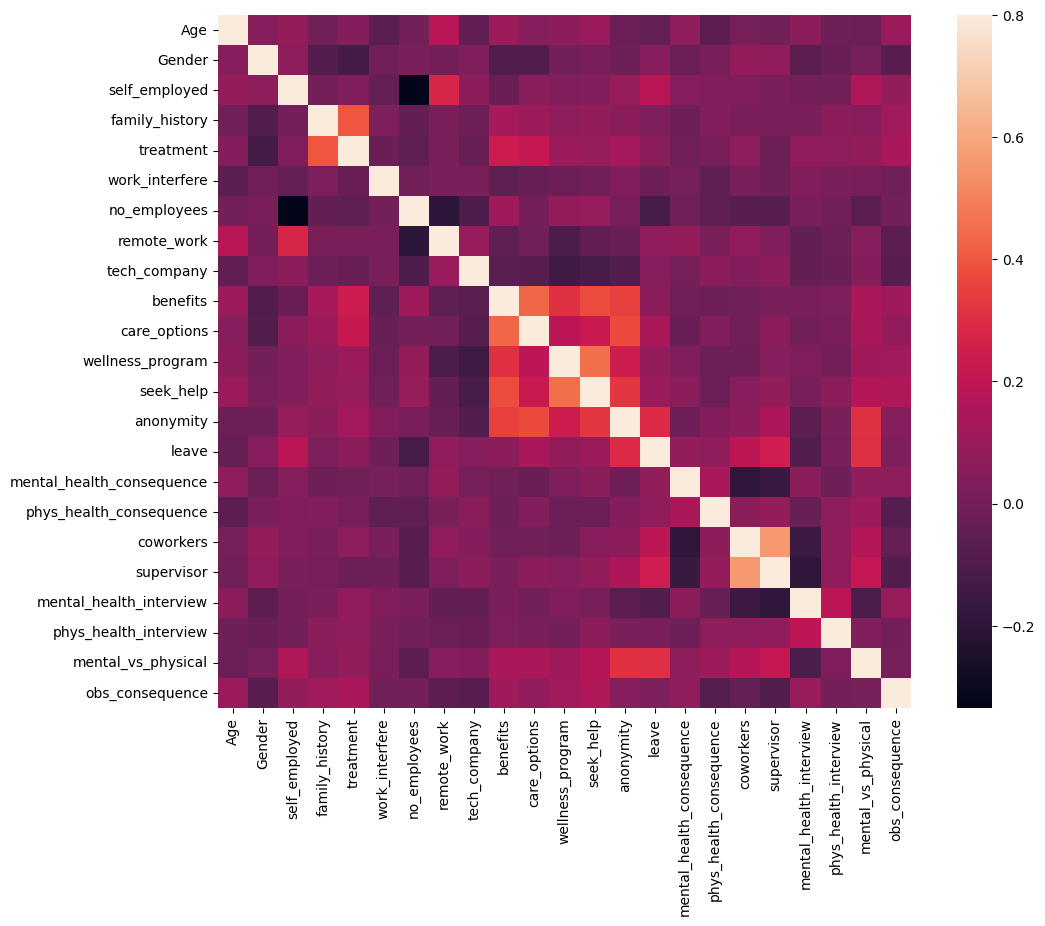

In [ ]:
#correlation matrix for training data
corrmat = newdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


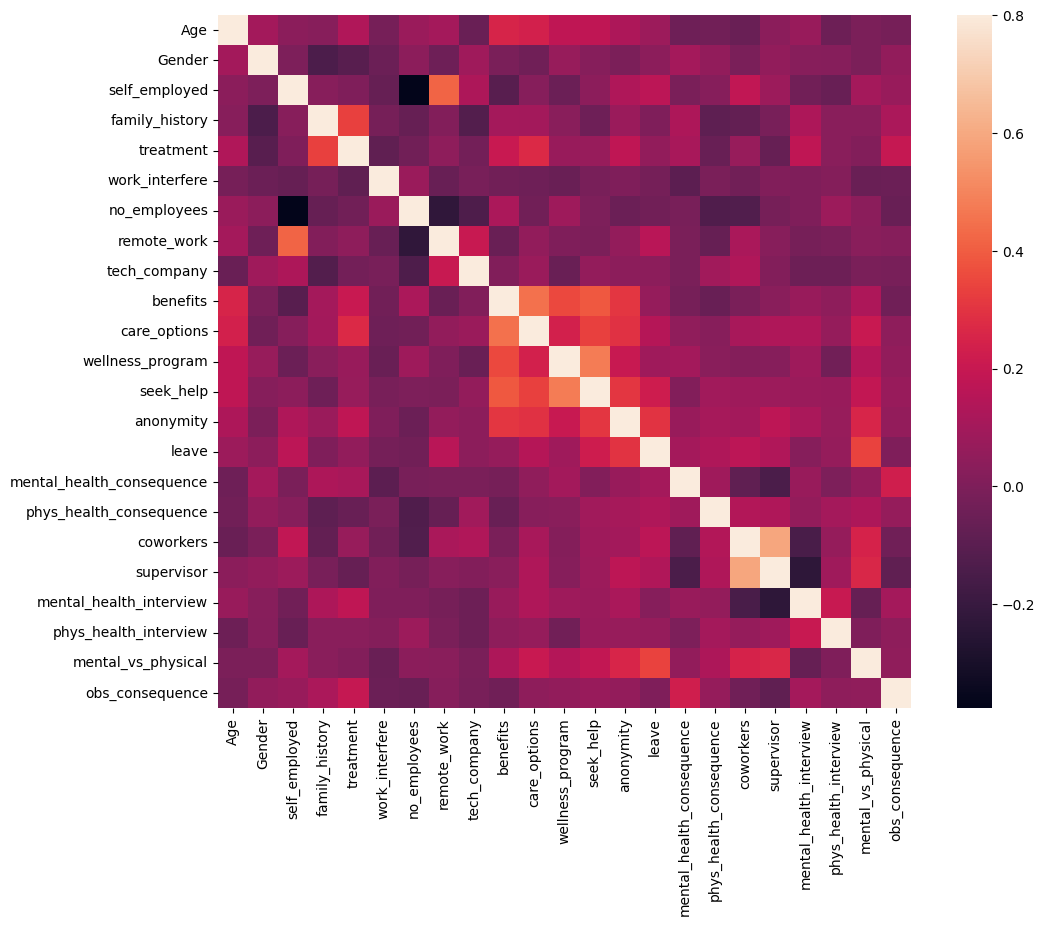

In [ ]:
#correlation matrix for testing data
corrmat = newdf2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

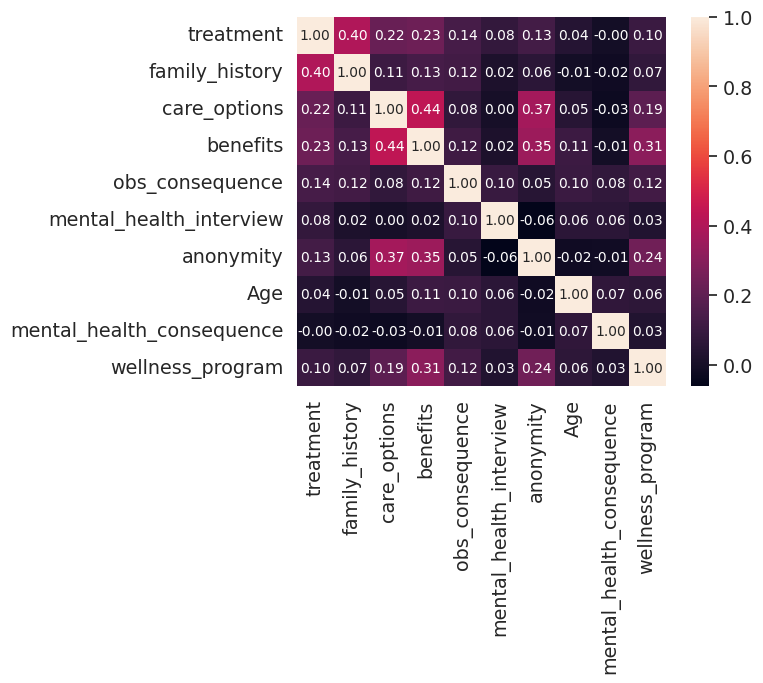

In [ ]:
#treatment correlation matrix for training data
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(newdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

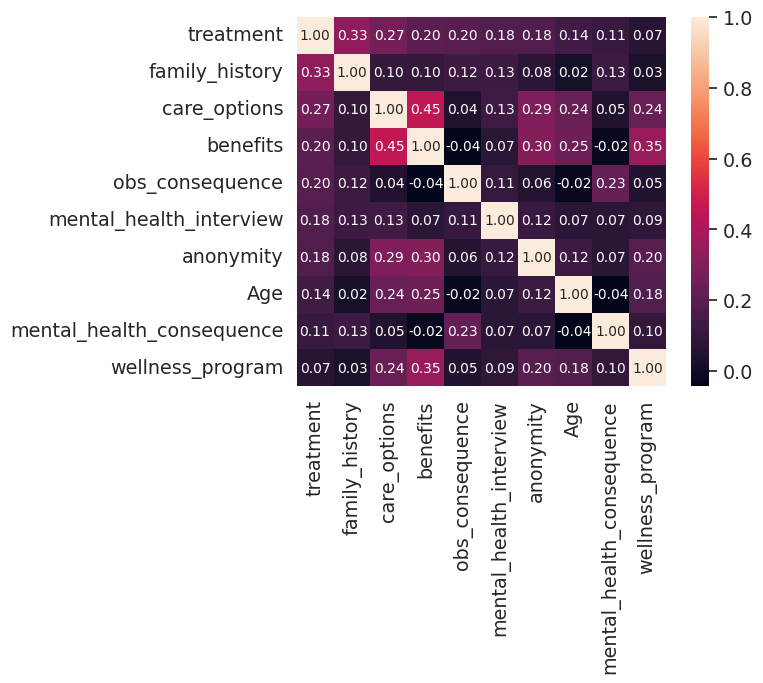

In [ ]:
#treatment correlation matrix for testing data
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(newdf2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#Self employed column contains as low as 2% null values , so it is okay to replace it with mode.
se_mode = train_data['self_employed'].mode().values[0]
train_data['self_employed'].fillna(se_mode,inplace=True)
se_mode2 = test_data['self_employed'].mode().values[0]
test_data['self_employed'].fillna(se_mode2,inplace=True)
# Work_interfere contains almost 20% null values which is significant as we have less data.Let us once see the null values to find any pattern
train_data[train_data['work_interfere'].isna()]['treatment'].value_counts()
test_data[test_data['work_interfere'].isna()]['treatment'].value_counts()

Series([], Name: treatment, dtype: int64)

In [ ]:
train_data['work_interfere'].fillna('Never',inplace = True)
test_data['work_interfere'].fillna('Never',inplace = True)

<Axes: >

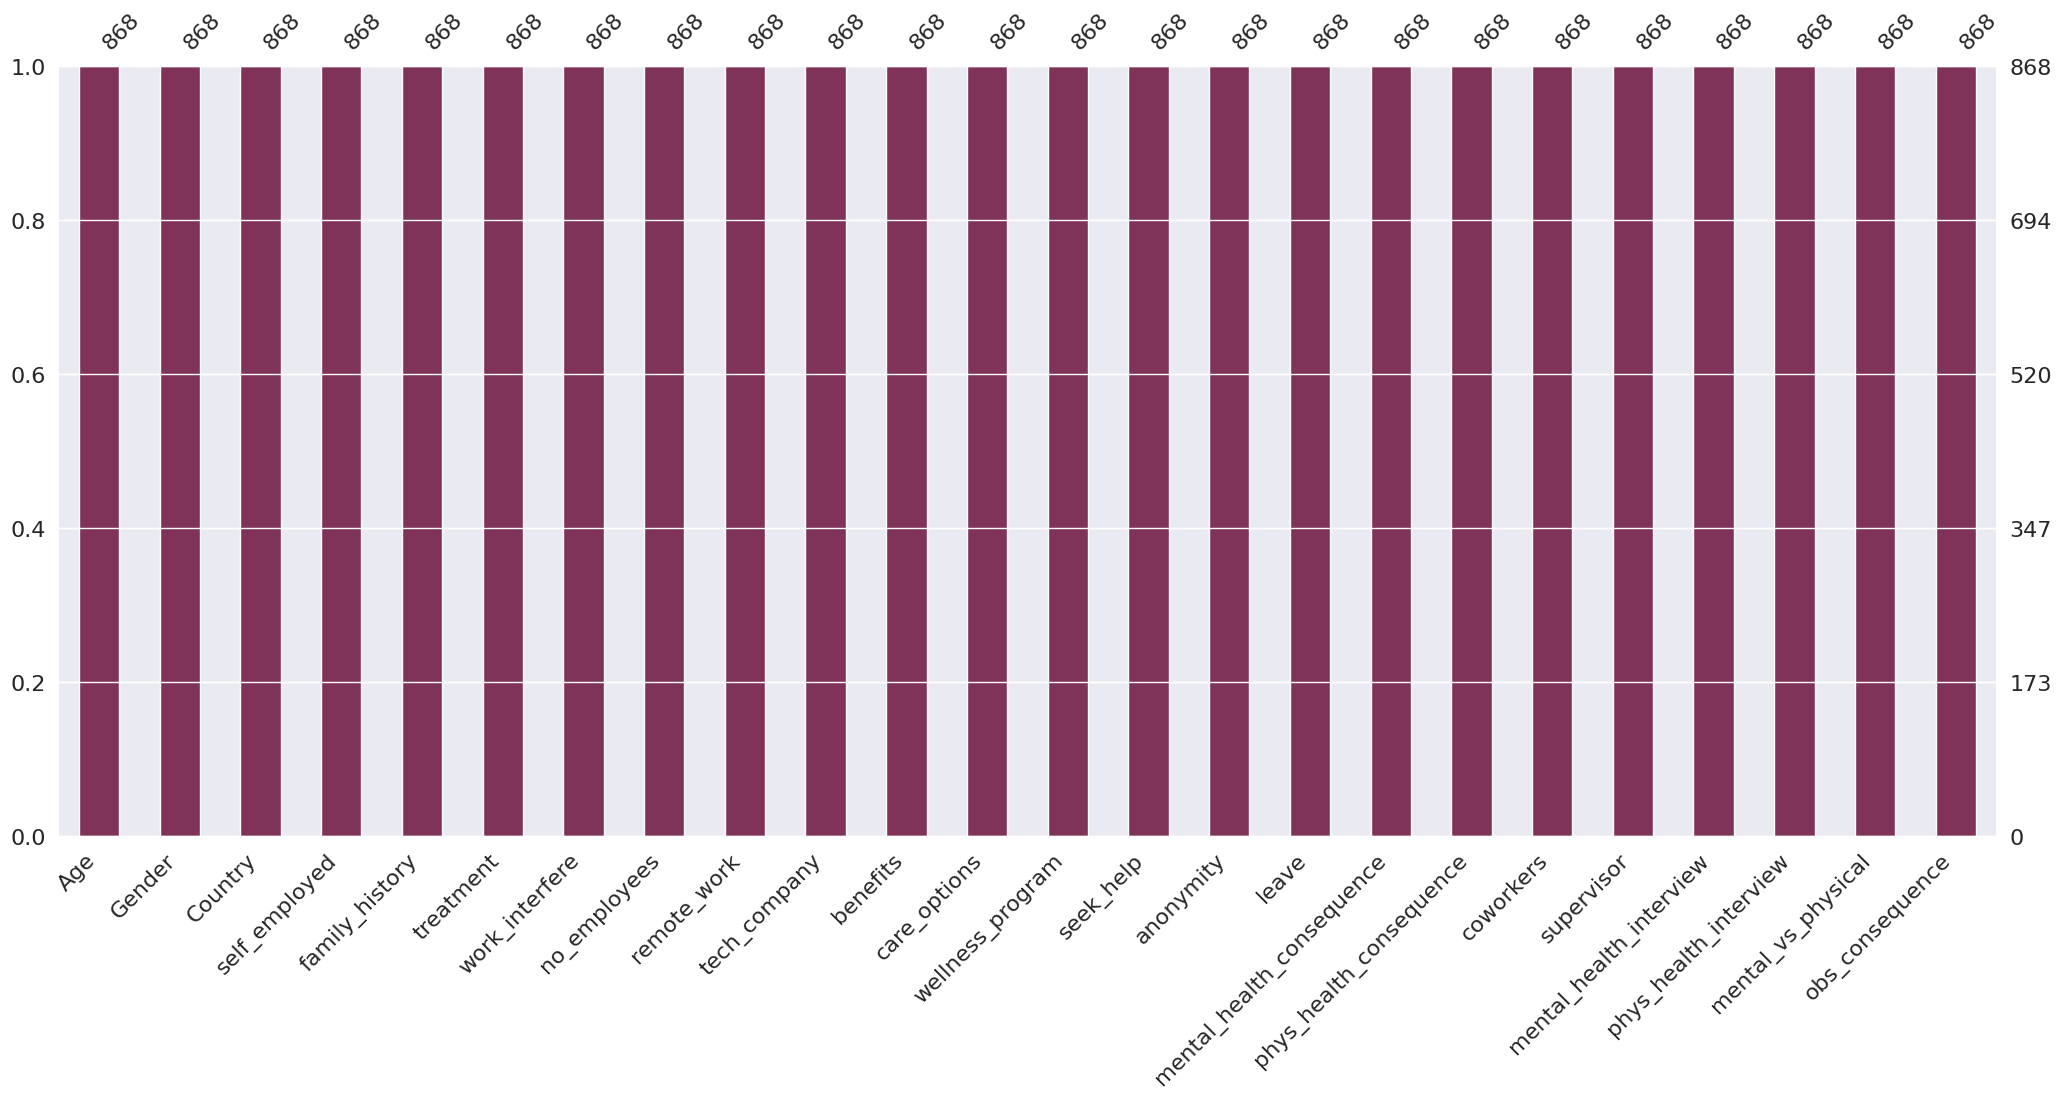

In [ ]:
import missingno as msno
msno.bar(train_data,color = (0.5,0.2,0.35))


<Axes: >

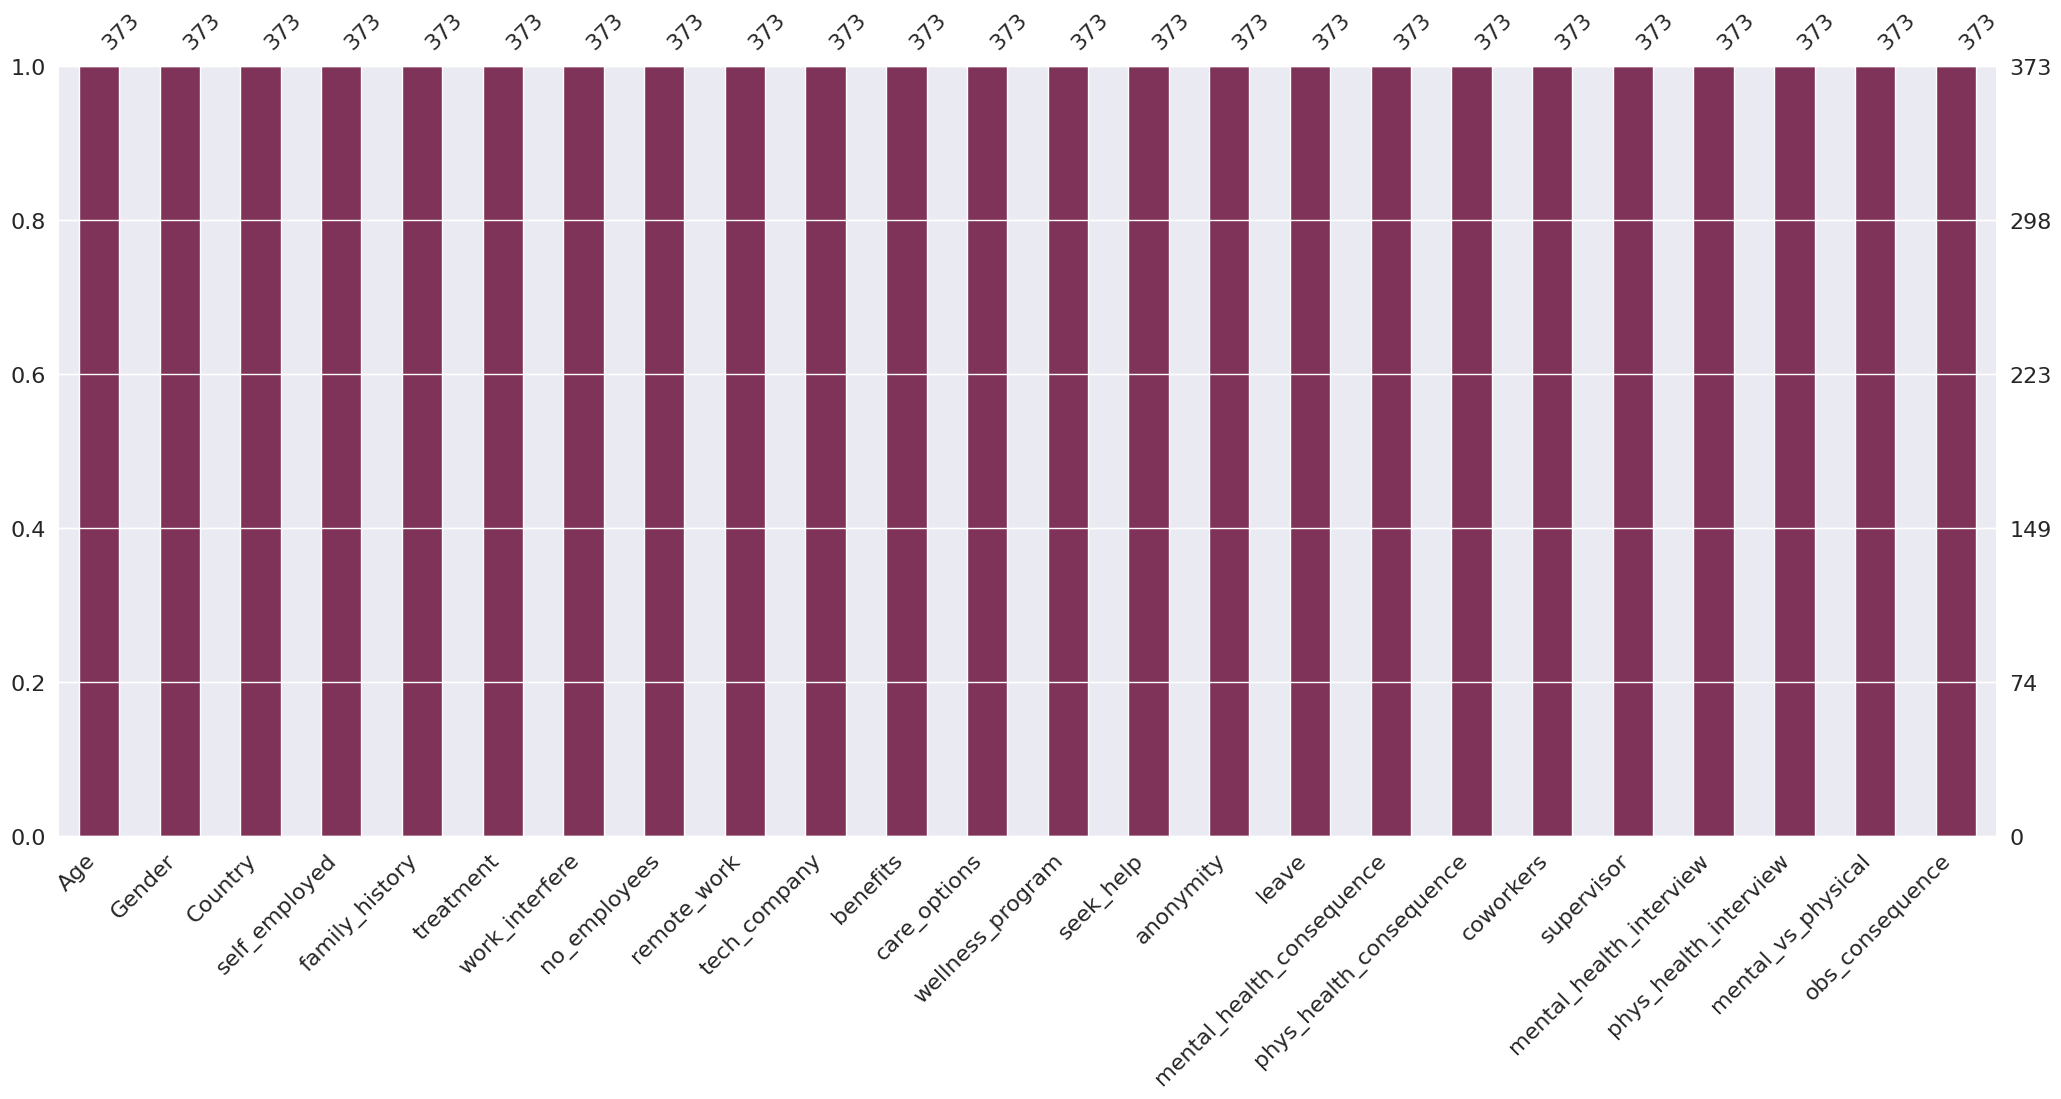

In [ ]:
import missingno as msno
msno.bar(test_data,color = (0.5,0.2,0.35))

In [ ]:
#No missing values, we are clear to go for the next step

In [ ]:
# Let us divide training set into independent and dependent variables
X_train = newdf.drop('treatment',axis=1)
y_train = newdf['treatment'].copy()
X_test=newdf2.drop('treatment',axis=1)
y_test = newdf2['treatment'].copy()

In [ ]:
newdf.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
newdf2.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
features = list(X_train.columns)
features

['Age',
 'Gender',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [ ]:
X_train.head()


,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1101,7,1,0,1,3,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
270,11,1,1,0,3,0,1,1,1,0,...,0,1,1,1,1,1,1,0,1,0
415,11,1,0,1,1,4,0,1,0,0,...,0,2,0,1,1,2,1,1,0,0
538,8,1,0,0,0,4,0,1,0,0,...,0,0,0,0,1,1,1,1,0,0
1106,31,1,1,0,3,2,1,1,1,0,...,0,0,0,0,1,2,1,1,0,0


In [ ]:
X_test.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
783,14,1,1,0,4,0,0,1,0,0,...,0,0,1,1,2,2,1,0,0,0
937,14,1,0,1,4,4,0,1,0,0,...,0,0,1,1,2,2,0,0,2,1
654,13,1,0,0,0,3,0,0,2,1,...,0,4,0,1,0,0,1,1,2,0
184,24,1,0,1,1,5,1,1,2,1,...,0,3,2,0,0,0,1,1,1,0
285,8,1,0,1,3,4,0,1,1,0,...,2,2,0,0,2,2,2,2,2,0


In [ ]:
#Data preprocessing part is completed.Now let us head to model building. We will try various models and then shortlist the promissing models.

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)

    # returning the scores
    score = pd.DataFrame({'Name' : name ,'F1_score_trainset' : [f1_train], 'F1_score_validationset' : [f1_val.mean()]})
    return score
def test_evaluate(model,X_test,y_test,name):

    y_pred = model.predict(X_test)
    f1_test = f1_score(y_test,y_pred)
    #Cross validation
    f1_val = cross_val_score(model,X_test,y_test,scoring='f1',cv=10)
    score = pd.DataFrame({'Name' : name ,'F1_score_testset' : [f1_test], 'F1_score_validationset' : [f1_val.mean()]})
    return score
def conf_matrix(model,X_test,y_test):
    y_pred = model.predict(X_test)
    cf_matrix = metrics.confusion_matrix(y_test,y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = ['NO', 'YES'])

    cm_display.plot()
    plt.show()

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
train_evaluate(log_reg,X_train,y_train,'Logistic Regression')

,Name,F1_score_trainset,F1_score_validationset
0,Logistic Regression,0.725581,0.699277


In [ ]:
test_evaluate(log_reg,X_test,y_test,'Logistic Regression')

,Name,F1_score_testset,F1_score_validationset
0,Logistic Regression,0.718919,0.677581


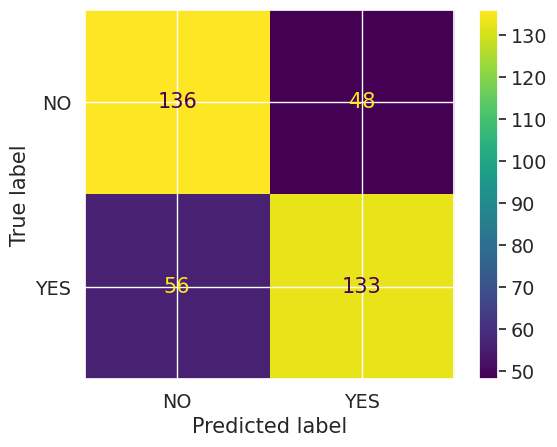

In [ ]:
#CONFUSION MATRIX
conf_matrix(log_reg,X_test,y_test)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4,random_state=42)
train_evaluate(dt_clf,X_train,y_train,'DecisionTreeClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,DecisionTreeClassifier,0.846939,0.847539


In [ ]:
test_evaluate(dt_clf,X_test,y_test,'DecisionTreeClassifier')

,Name,F1_score_testset,F1_score_validationset
0,DecisionTreeClassifier,0.856459,0.857643


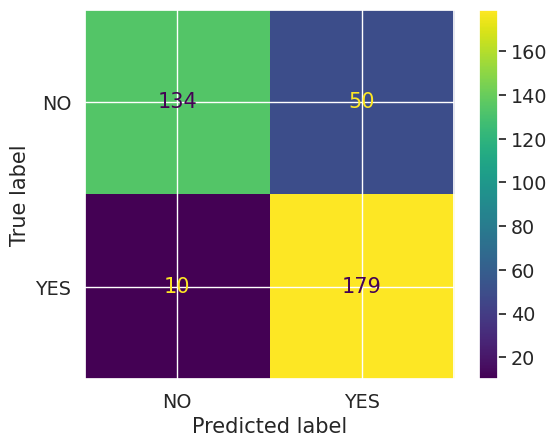

In [ ]:
#CONFUSION MATRIX
conf_matrix(dt_clf,X_test,y_test)

In [ ]:
#SVM
from sklearn.svm import SVC
svc_clf = SVC()
train_evaluate(svc_clf,X_train,y_train,'Support Vector Classifier')

,Name,F1_score_trainset,F1_score_validationset
0,Support Vector Classifier,0.718861,0.67411


In [ ]:
test_evaluate(svc_clf,X_test,y_test,'Support Vector Classifier')

,Name,F1_score_testset,F1_score_validationset
0,Support Vector Classifier,0.694517,0.625501


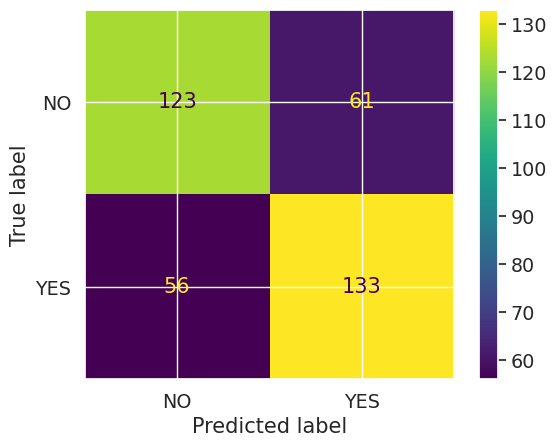

In [ ]:
#CONFUSION MATRIX
conf_matrix(svc_clf,X_test,y_test)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
train_evaluate(rnd_clf,X_train,y_train,'RandomForestClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,RandomForestClassifier,1.0,0.813441


In [ ]:
test_evaluate(rnd_clf,X_test,y_test,'RandomForestClassifier')

,Name,F1_score_testset,F1_score_validationset
0,RandomForestClassifier,0.825,0.814427


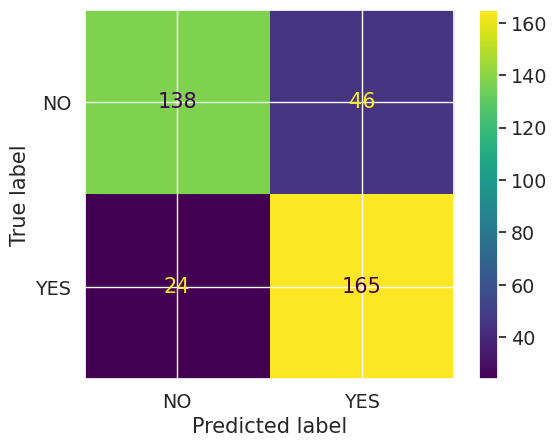

In [ ]:
#CONFUSION MATRIX
conf_matrix(rnd_clf,X_test,y_test)


In [ ]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
dt_clf_ada = DecisionTreeClassifier()
Ada_clf = AdaBoostClassifier(base_estimator=dt_clf_ada,random_state=42)

train_evaluate(Ada_clf,X_train,y_train,"ADA BOOST CLASSIFIER")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

,Name,F1_score_trainset,F1_score_validationset
0,ADA BOOST CLASSIFIER,1.0,0.733811


In [ ]:
test_evaluate(Ada_clf,X_test,y_test,"ADA BOOST CLASSIFIER")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

,Name,F1_score_testset,F1_score_validationset
0,ADA BOOST CLASSIFIER,0.77628,0.733032


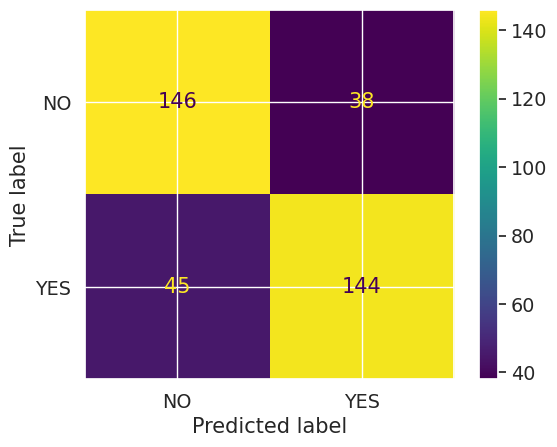

In [ ]:
#CONFUSION MATRIX
conf_matrix(Ada_clf,X_test,y_test)

In [ ]:
#XGBOOST
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(verbosity=0)
train_evaluate(xgb_clf,X_train,y_train,"XG Boost CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,XG Boost CLASSIFIER,0.99886,0.807545


In [ ]:
test_evaluate(xgb_clf,X_test,y_test,"XG Boost CLASSIFIER")

,Name,F1_score_testset,F1_score_validationset
0,XG Boost CLASSIFIER,0.815385,0.821939


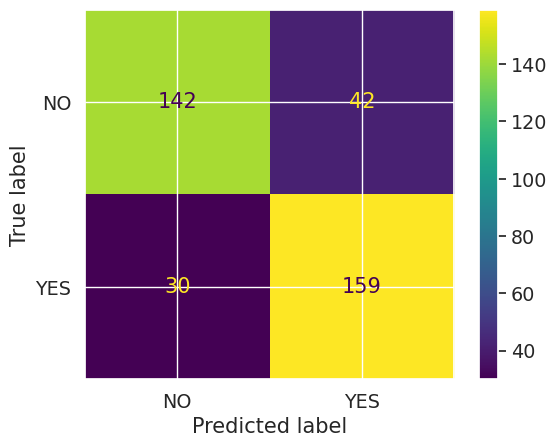

In [ ]:
#CONFUSION MATRIX
conf_matrix(xgb_clf,X_test,y_test)

In [ ]:
#Shortlisting the promising Models-
#SVM
#Random Forest
#XGBoost



In [ ]:
from sklearn.svm import SVC

In [ ]:
#FINE TUNING SVM
from sklearn.model_selection import GridSearchCV
param_distribs = {
        'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'kernel': ['linear', 'rbf','polynomial']
    }
grid_cv = GridSearchCV(SVC(), param_grid = param_distribs,
                              cv=5,scoring='f1',
                              verbose=3)
grid_cv.fit(X_train,y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.699 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.682 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.642 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.630 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.690 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.672 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=1, kernel=polynom

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='f1', verbose=3)

In [ ]:
grid_cv.fit(X_test,y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.649 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.703 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.615 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=1, kernel=polynom

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='f1', verbose=3)

In [ ]:
grid_cv.best_estimator_

SVC(C=100, gamma=0.01)

In [ ]:
train_evaluate(grid_cv.best_estimator_,X_train,y_train,"SVC Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,SVC Tuned,0.943144,0.750588


In [ ]:
test_evaluate(grid_cv.best_estimator_,X_test,y_test,"SVC Tuned")

,Name,F1_score_testset,F1_score_validationset
0,SVC Tuned,0.765625,0.728928


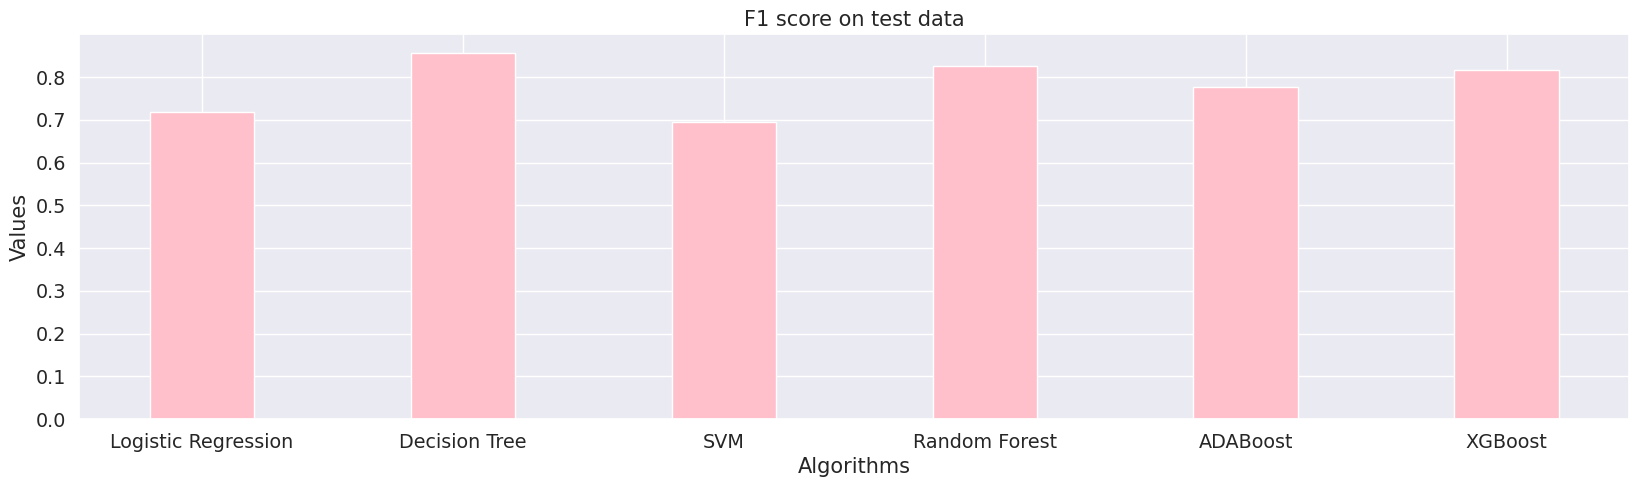

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Logistic Regression':0.7190, 'Decision Tree':0.857, 'SVM':0.695,
        'Random Forest':0.825,'ADABoost':0.777,'XGBoost':0.816}
algorithms = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(algorithms, values, color ='pink',
        width = 0.4)

plt.xlabel("Algorithms")
plt.ylabel("Values")
plt.title("F1 score on test data")
plt.show()

In [ ]:
#FINE TUNING RANDOM FOREST MODEL
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=6, n_estimators=10,
                       random_state=42)

In [ ]:
train_evaluate(grid_search.best_estimator_,X_train,y_train,"RandomForest Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,RandomForest Tuned,0.849287,0.840036


In [ ]:
test_evaluate(grid_search.best_estimator_,X_test,y_test,"RandomForest Tuned")

,Name,F1_score_testset,F1_score_validationset
0,RandomForest Tuned,0.854415,0.85548


In [ ]:
# fine tuning xgboost
param_grid = [
    {'n_estimators':[3,10,30,50,100],
     'eta' : [0.01,0.025, 0.05, 0.1],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4],'subsample': [0.5,0.75],'booster':['gblinear','gbtree']}
]

xgb_clf = XGBClassifier(verbosity = 0)
grid_search3 = GridSearchCV(xgb_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'booster': ['gblinear', 'gbtree'],
                          'eta': [0.01, 0.025, 0.05, 0.1],
                          'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'subsample': [0.5, 0.75]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search3.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'booster': ['gblinear', 'gbtree'],
                          'eta': [0.01, 0.025, 0.05, 0.1],
                          'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'subsample': [0.5, 0.75]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search3.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_features=2, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
train_evaluate(grid_search3.best_estimator_,X_train,y_train,"XGBoost Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,XGBoost Finetuned,0.864407,0.835716


In [ ]:
test_evaluate(grid_search3.best_estimator_,X_test,y_test,"XGBoost Finetuned")

,Name,F1_score_testset,F1_score_validationset
0,XGBoost Finetuned,0.833747,0.847258


In [ ]:
XGBoost_final = grid_search3.best_estimator_

In [ ]:
scores = pd.DataFrame({'Train_score' : [0.9432,0.8493,0.8645],'Train_Val_score' : [0.751,0.8400,0.8358],
                       'Test_score':[0.7657,0.8545,0.8338],'Test_Val_score' : [0.7290,0.8555,0.8473]}
                        ,index=['SVM','RandomForest','XGBoost'])
scores

,Train_score,Train_Val_score,Test_score,Test_Val_score
SVM,0.9432,0.7510,0.7657,0.7290
RandomForest,0.8493,0.8400,0.8545,0.8555
XGBoost,0.8645,0.8358,0.8338,0.8473


In [ ]:
#

In [ ]:
X_test = newdf.drop('treatment',axis=1)
y_test = newdf['treatment'].copy()
X_test['self_employed'].fillna(se_mode,inplace=True)
X_test['work_interfere'].fillna('Never',inplace = True)

In [ ]:
#We have a developed a model which can predict whether a employee seeks mental health treatment or not.

Text(0.5, 1.0, 'Key Features')

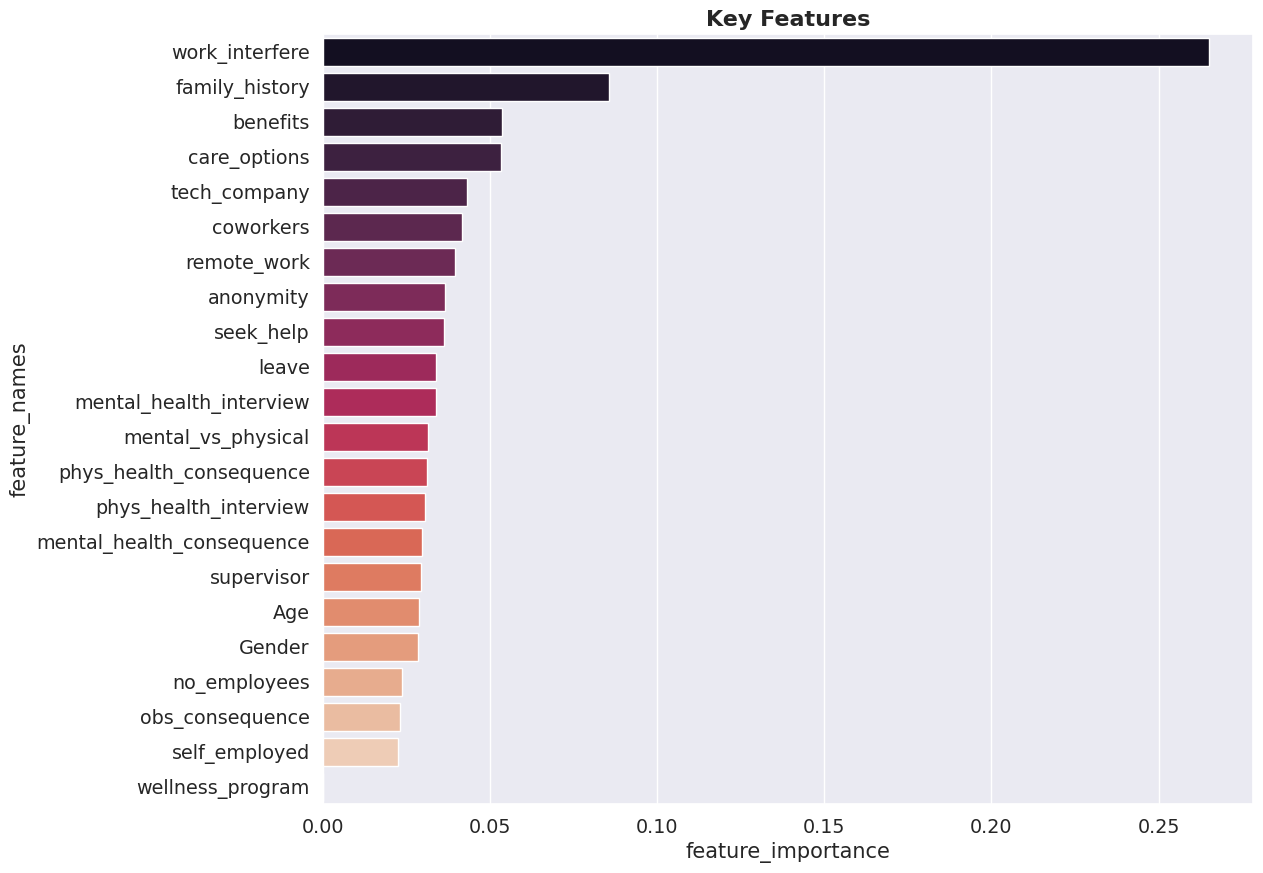

In [ ]:
data = {'feature_names':features,'feature_importance': XGBoost_final.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#plotting featture importance
plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Key Features", fontsize=16, fontweight="bold")

In [ ]:
#Work interference has the largest contribution. Whether the employee's mental health issues interfering with the work is the thing that the company should ask for its employees.
#Family history and care options(programs and benfits) provided by company is also influential in employees who want to get treatment.
#For all the remaining features,there has been a little contribution.
#Noticing/knowing some of these features beforehand can even help support an individual who may be experiencing a mental health issues and and connect them with the appropriate employee resources.